In [227]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from tqdm import tnrange, tqdm_notebook
import zipfile
import os
import pickle
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Extraction

In [2]:
def unzip_data(src, dest):
    zip = zipfile.ZipFile(src, 'r')
    nameList = zip.namelist()
    
    count = 0

    for item in tqdm(nameList, desc='Unzipping'):
        dir, file = os.path.split(item)
        if dir.find("__MACOSX") == -1:
            #print(count, item, "Dir=", dir, "File=", file)
            count += 1            
            zip.extract(item, dest)
    zip.close()

In [71]:
unzip_data('./data.zip', './data')

Unzipping: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 48224/48224 [05:42<00:00, 140.95it/s]


# New Data Cleanup

In [239]:
new_data_root = './new_data/'

In [431]:
new_data_root = './track_2_data/'

In [771]:
new_data_root = './turn_correction_data - Copy/'

In [772]:
new_data_root = './new_data - Copy/'

In [785]:
new_driving_log = pd.read_csv(new_data_root + 'driving_log.csv', header=None, 
                              names=['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed'])

In [784]:
new_driving_log = pd.read_csv(new_data_root + 'driving_log.csv')

In [786]:
new_driving_log.head()

,center,left,right,steering,throttle,brake,speed
0,C:\Users\I302861\OneDrive - SAP SE\Documents\P...,C:\Users\I302861\OneDrive - SAP SE\Documents\P...,C:\Users\I302861\OneDrive - SAP SE\Documents\P...,0.0,0.0,0.0,0.000004
1,C:\Users\I302861\OneDrive - SAP SE\Documents\P...,C:\Users\I302861\OneDrive - SAP SE\Documents\P...,C:\Users\I302861\OneDrive - SAP SE\Documents\P...,0.0,0.0,0.0,0.000013
2,C:\Users\I302861\OneDrive - SAP SE\Documents\P...,C:\Users\I302861\OneDrive - SAP SE\Documents\P...,C:\Users\I302861\OneDrive - SAP SE\Documents\P...,0.0,0.0,0.0,0.000015
3,C:\Users\I302861\OneDrive - SAP SE\Documents\P...,C:\Users\I302861\OneDrive - SAP SE\Documents\P...,C:\Users\I302861\OneDrive - SAP SE\Documents\P...,0.0,0.0,0.0,0.000014
4,C:\Users\I302861\OneDrive - SAP SE\Documents\P...,C:\Users\I302861\OneDrive - SAP SE\Documents\P...,C:\Users\I302861\OneDrive - SAP SE\Documents\P...,0.0,0.0,0.0,0.000009


In [787]:
new_driving_log['center'] = new_driving_log['center'].apply(lambda path: '/'.join(path.split('\\')[-2:]))
new_driving_log['left'] = new_driving_log['left'].apply(lambda path: '/'.join(path.split('\\')[-2:]))
new_driving_log['right'] = new_driving_log['right'].apply(lambda path: '/'.join(path.split('\\')[-2:]))

In [788]:
new_driving_log.describe()

,steering,throttle,brake,speed
count,9369.000000,9369.000000,9369.000000,9.369000e+03
mean,-0.007613,0.291270,0.013553,2.024805e+01
std,0.369294,0.401607,0.101055,5.630940e+00
min,-1.000000,0.000000,0.000000,9.678232e-07
25%,-0.090226,0.000000,0.000000,1.626796e+01
50%,0.000000,0.000000,0.000000,1.964512e+01
75%,0.000000,0.639852,0.000000,2.434397e+01
max,1.000000,1.000000,1.000000,3.019202e+01


In [790]:
driving_log = new_driving_log

# File Server

In [438]:
# os.system('start cmd /c ngrok http 5005')

In [439]:
# os.system('python -m http.server 5005')

In [440]:
t1, t2 = "model.h5,model2.h5".split(',')
t1, t2

('model.h5', 'model2.h5')

python data_server.py

ngrok http 5005

python -m http.server 5005

wget -P ../new_data http://b6ef66ac.ngrok.io/new_data/data.zip

python data_extractor.py ../new_data/data.zip ../more_data

python model.py ../more_data model.h5,model2.h5

python model.py ../more_data model_new.h5

python drive.py model_new.h5 

150/150 [==============================] - 61s - loss: 0.0211 - acc: 0.1807 - val_loss: 0.0182 - val_acc: 0.1824
Epoch 2/5
150/150 [==============================] - 35s - loss: 0.0167 - acc: 0.1799 - val_loss: 0.0166 - val_acc: 0.1824
Epoch 3/5
150/150 [==============================] - 35s - loss: 0.0158 - acc: 0.1804 - val_loss: 0.0143 - val_acc: 0.1839
Epoch 4/5
150/150 [==============================] - 35s - loss: 0.0146 - acc: 0.1798 - val_loss: 0.0144 - val_acc: 0.1839
Epoch 5/5
150/150 [==============================] - 35s - loss: 0.0139 - acc: 0.1819 - val_loss: 0.0122 - val_acc: 0.1843

64/64 [==============================] - 18s - loss: 0.0182 - acc: 0.1483 - val_loss: 0.0107 - val_acc: 0.1392
Epoch 2/5
64/64 [==============================] - 16s - loss: 0.0104 - acc: 0.1488 - val_loss: 0.0086 - val_acc: 0.1404
Epoch 3/5
64/64 [==============================] - 16s - loss: 0.0089 - acc: 0.1496 - val_loss: 0.0077 - val_acc: 0.1410
Epoch 4/5
64/64 [==============================] - 16s - loss: 0.0084 - acc: 0.1482 - val_loss: 0.0071 - val_acc: 0.1425
Epoch 5/5
64/64 [==============================] - 16s - loss: 0.0075 - acc: 0.1488 - val_loss: 0.0060 - val_acc: 0.1379

Transfer Learning
Epoch 1/5
14/14 [==============================] - 4s - loss: 0.0155 - acc: 0.1105 - val_loss: 0.0146 - val_acc: 0.1250
Epoch 2/5
14/14 [==============================] - 3s - loss: 0.0151 - acc: 0.1027 - val_loss: 0.0138 - val_acc: 0.1224
Epoch 3/5
14/14 [==============================] - 3s - loss: 0.0145 - acc: 0.1133 - val_loss: 0.0124 - val_acc: 0.1328
Epoch 4/5
14/14 [==============================] - 3s - loss: 0.0134 - acc: 0.1130 - val_loss: 0.0124 - val_acc: 0.1172
Epoch 5/5
14/14 [==============================] - 3s - loss: 0.0137 - acc: 0.1075 - val_loss: 0.0112 - val_acc: 0.1276

104/104 [==============================] - 28s - loss: 0.1223 - acc: 0.0566 - val_loss: 0.0844 - val_acc: 0.0709
Epoch 2/5
104/104 [==============================] - 24s - loss: 0.0878 - acc: 0.0638 - val_loss: 0.0775 - val_acc: 0.0722
Epoch 3/5
104/104 [==============================] - 24s - loss: 0.0804 - acc: 0.0640 - val_loss: 0.0706 - val_acc: 0.0765
Epoch 4/5
104/104 [==============================] - 23s - loss: 0.0757 - acc: 0.0658 - val_loss: 0.0661 - val_acc: 0.0759
Epoch 5/5
104/104 [==============================] - 24s - loss: 0.0735 - acc: 0.0666 - val_loss: 0.0654 - val_acc: 0.0744

# Data

In [4]:
# Load pickled data
with open('small_train_traffic.p', mode='rb') as f:
    data = pickle.load(f)

In [5]:
# split the data
X_train, y_train = data['features'], data['labels']

In [6]:
X_train.shape, y_train.shape

((100, 32, 32, 3), (100,))

In [138]:
data_root = './new_data/'
driving_log_name = 'new_driving_log.csv'

In [250]:
data_root = './data/'
driving_log_name = 'driving_log.csv'

In [441]:
data_root = './track_2_data/'
driving_log_name = 'driving_log.csv'

In [683]:
data_root = './turn_correction_data/'
driving_log_name = 'driving_log.csv'

In [766]:
data_root = './new_data - Copy/'
driving_log_name = 'driving_log.csv'

In [767]:
driving_log = pd.read_csv(data_root + driving_log_name)

In [791]:
driving_log.head()

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2019_02_18_00_11_36_652.jpg,IMG/left_2019_02_18_00_11_36_652.jpg,IMG/right_2019_02_18_00_11_36_652.jpg,0.0,0.0,0.0,0.000004
1,IMG/center_2019_02_18_00_11_36_718.jpg,IMG/left_2019_02_18_00_11_36_718.jpg,IMG/right_2019_02_18_00_11_36_718.jpg,0.0,0.0,0.0,0.000013
2,IMG/center_2019_02_18_00_11_36_784.jpg,IMG/left_2019_02_18_00_11_36_784.jpg,IMG/right_2019_02_18_00_11_36_784.jpg,0.0,0.0,0.0,0.000015
3,IMG/center_2019_02_18_00_11_36_858.jpg,IMG/left_2019_02_18_00_11_36_858.jpg,IMG/right_2019_02_18_00_11_36_858.jpg,0.0,0.0,0.0,0.000014
4,IMG/center_2019_02_18_00_11_36_930.jpg,IMG/left_2019_02_18_00_11_36_930.jpg,IMG/right_2019_02_18_00_11_36_930.jpg,0.0,0.0,0.0,0.000009


In [792]:
correction = 0.2
driving_log['steering_left'] = driving_log['steering'] + correction
driving_log['steering_right'] = driving_log['steering'] - correction

In [793]:
driving_log.head()

,center,left,right,steering,throttle,brake,speed,steering_left,steering_right
0,IMG/center_2019_02_18_00_11_36_652.jpg,IMG/left_2019_02_18_00_11_36_652.jpg,IMG/right_2019_02_18_00_11_36_652.jpg,0.0,0.0,0.0,0.000004,0.2,-0.2
1,IMG/center_2019_02_18_00_11_36_718.jpg,IMG/left_2019_02_18_00_11_36_718.jpg,IMG/right_2019_02_18_00_11_36_718.jpg,0.0,0.0,0.0,0.000013,0.2,-0.2
2,IMG/center_2019_02_18_00_11_36_784.jpg,IMG/left_2019_02_18_00_11_36_784.jpg,IMG/right_2019_02_18_00_11_36_784.jpg,0.0,0.0,0.0,0.000015,0.2,-0.2
3,IMG/center_2019_02_18_00_11_36_858.jpg,IMG/left_2019_02_18_00_11_36_858.jpg,IMG/right_2019_02_18_00_11_36_858.jpg,0.0,0.0,0.0,0.000014,0.2,-0.2
4,IMG/center_2019_02_18_00_11_36_930.jpg,IMG/left_2019_02_18_00_11_36_930.jpg,IMG/right_2019_02_18_00_11_36_930.jpg,0.0,0.0,0.0,0.000009,0.2,-0.2


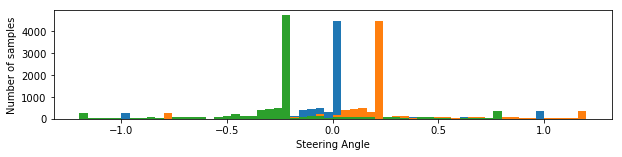

In [794]:
plt.figure(figsize=(10, 2))
plt.hist(driving_log['steering'], bins=50)
plt.hist(driving_log['steering_left'], bins=50)
plt.hist(driving_log['steering_right'], bins=50)
plt.xlabel("Steering Angle")
plt.ylabel("Number of samples")

In [734]:
driving_log['center'][0]

'IMG/center_2019_02_18_00_11_37_143.jpg'

In [742]:
test_img = mpimg.imread(data_root + driving_log['left'][0])

In [743]:
def read_image(rownum, camera='center'):
    return mpimg.imread(data_root + driving_log[camera][rownum])

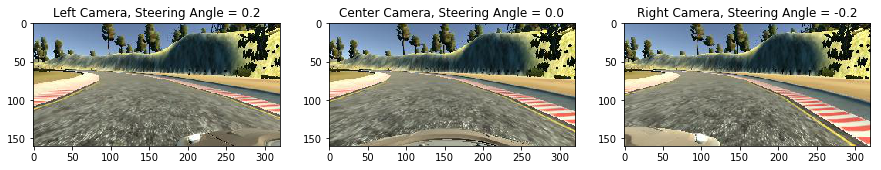

In [756]:
fig, axes = plt.subplots(1, 3, figsize=(15, 9))
axes[0].imshow(read_image(0, 'left'))
axes[0].set_title("Left Camera, Steering Angle = " + str(driving_log['steering_left'][0]))
axes[1].imshow(read_image(0, 'center'))
axes[1].set_title("Center Camera, Steering Angle = " + str(driving_log['steering'][0]))
axes[2].imshow(read_image(0, 'right'))
axes[2].set_title("Right Camera, Steering Angle = " + str(driving_log['steering_right'][0]))

In [667]:
test_img.shape

(160, 320, 3)

In [668]:
samples = np.concatenate((
    driving_log[['center', 'steering']].values, 
    driving_log[['left', 'steering_left']].values,
    driving_log[['right', 'steering_right']].values
))

In [669]:
samples.shape

(1743, 2)

In [670]:
samples[0][0]

'IMG/center_2019_02_17_21_06_10_140.jpg'

In [386]:
sklearn.utils.shuffle(samples)

array([['IMG/center_2019_02_17_21_45_48_453.jpg', -0.3834586],
       ['IMG/left_2019_02_17_21_45_04_785.jpg', -0.206015],
       ['IMG/left_2019_02_17_21_47_00_064.jpg', -0.4917293000000001],
       ..., 
       ['IMG/center_2019_02_17_21_44_23_372.jpg', 0.2105263],
       ['IMG/left_2019_02_17_21_43_42_849.jpg', 0.4180451],
       ['IMG/left_2019_02_17_21_46_35_653.jpg', 0.47067670000000006]], dtype=object)

# Data Pruning

In [693]:
drop_indices = np.random.choice(driving_log.index[driving_log['steering'] == 0], 3500, replace=False)
print(drop_indices)
driving_log.loc[drop_indices][driving_log.loc[drop_indices]['steering'] != 0].count()
driving_log.loc[drop_indices][driving_log.loc[drop_indices]['steering'] == 0].count()
#driving_log.drop([drop_indices]).count()
driving_log.loc[drop_indices]
driving_log.drop(drop_indices).count(), driving_log.count()
driving_log.drop(drop_indices)[driving_log.drop(drop_indices)['steering'] == 0].count()
driving_log[driving_log['steering'] == 0].count()

[5794  964 2598 ..., 3484 2866 2495]


center            4439
left              4439
right             4439
steering          4439
throttle          4439
brake             4439
speed             4439
steering_left     4439
steering_right    4439
dtype: int64

In [694]:
def get_pruned_df(df, num_to_remove):
    drop_indices = np.random.choice(df.index[df['steering'] == 0], num_to_remove, replace=False)
    return df.drop(drop_indices), drop_indices

In [709]:
driving_log_pruned = get_pruned_df(driving_log, 3800)[0]
driving_log_pruned[driving_log_pruned['steering'] == 0].count()

center            639
left              639
right             639
steering          639
throttle          639
brake             639
speed             639
steering_left     639
steering_right    639
dtype: int64

(array([ 257.,   36.,   35.,   43.,   53.,    0.,   42.,   56.,   63.,
          56.,    0.,   60.,   69.,   75.,   65.,    0.,   88.,  108.,
         230.,  136.,  114.,  400.,  430.,  503.,  937.,   19.,   82.,
         117.,  120.,   41.,   61.,   98.,   85.,   83.,   75.,    0.,
          74.,   74.,   37.,    0.,   60.,   65.,   47.,   38.,    0.,
          51.,   52.,   33.,   28.,  373.]),
 array([-1.2 , -1.16, -1.12, -1.08, -1.04, -1.  , -0.96, -0.92, -0.88,
        -0.84, -0.8 , -0.76, -0.72, -0.68, -0.64, -0.6 , -0.56, -0.52,
        -0.48, -0.44, -0.4 , -0.36, -0.32, -0.28, -0.24, -0.2 , -0.16,
        -0.12, -0.08, -0.04,  0.  ,  0.04,  0.08,  0.12,  0.16,  0.2 ,
         0.24,  0.28,  0.32,  0.36,  0.4 ,  0.44,  0.48,  0.52,  0.56,
         0.6 ,  0.64,  0.68,  0.72,  0.76,  0.8 ]),
 <a list of 50 Patch objects>)

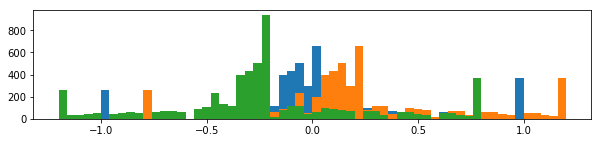

In [707]:
plt.figure(figsize=(10, 2))
plt.hist(driving_log_pruned['steering'], bins=50)
plt.hist(driving_log_pruned['steering_left'], bins=50)
plt.hist(driving_log_pruned['steering_right'], bins=50)

In [705]:
def prune(driving_log, num_to_remove):
    pruned_df, dropped_indices = get_pruned_df(driving_log, num_to_remove)
    print(len(dropped_indices), len(pruned_df))
    #delete_dropped_images(driving_log.iloc[dropped_indices])
    return pruned_df

In [636]:
def delete_dropped_images(dropped_rows):
    dropped_rows['center'].apply(lambda img: os.remove(data_root + img) if os.path.exists(data_root + img) else 'Skipped')
    dropped_rows['left'].apply(lambda img: os.remove(data_root + img) if os.path.exists(data_root + img) else 'Skipped')
    dropped_rows['right'].apply(lambda img: os.remove(data_root + img) if os.path.exists(data_root + img) else 'Skipped')

In [704]:
driving_log_pruned = prune(driving_log, 3800)

3800 5569


In [645]:
driving_log_pruned[driving_log_pruned['steering'] != 0].count()

center            526
left              526
right             526
steering          526
throttle          526
brake             526
speed             526
steering_left     526
steering_right    526
dtype: int64

(array([ 18.,   6.,  26.,   7.,  19.,   6.,   4.,   5.,   5.,  24.,  11.,
          6.,  27.,   5.,  10.,  30.,  28.,  11.,  18.,  14.,  32.,   9.,
         11.,  16.,  15.,  58.,  10.,   3.,   7.,   5.,  16.,   3.,   1.,
          1.,   1.,  17.,   6.,   9.,   2.,   6.,   3.,   4.,   4.,   1.,
          3.,   0.,  23.,   1.,  10.,  24.]),
 array([-0.5       , -0.48811765, -0.47623529, -0.46435294, -0.45247058,
        -0.44058823, -0.42870588, -0.41682352, -0.40494117, -0.39305881,
        -0.38117646, -0.36929411, -0.35741175, -0.3455294 , -0.33364704,
        -0.32176469, -0.30988234, -0.29799998, -0.28611763, -0.27423527,
        -0.26235292, -0.25047057, -0.23858821, -0.22670586, -0.2148235 ,
        -0.20294115, -0.1910588 , -0.17917644, -0.16729409, -0.15541173,
        -0.14352938, -0.13164703, -0.11976467, -0.10788232, -0.09599996,
        -0.08411761, -0.07223526, -0.0603529 , -0.04847055, -0.03658819,
        -0.02470584, -0.01282349, -0.00094113,  0.01094122,  0.02282358,
 

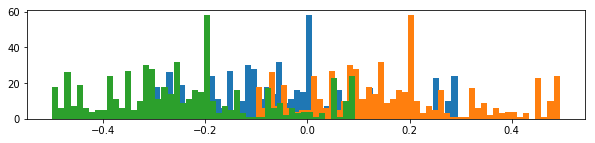

In [648]:
plt.figure(figsize=(10, 2))
plt.hist(driving_log_pruned['steering'], bins=50)
plt.hist(driving_log_pruned['steering_left'], bins=50)
plt.hist(driving_log_pruned['steering_right'], bins=50)

In [649]:
driving_log_pruned.to_csv(data_root + 'pruned.csv')

In [679]:
np.where(driving_log['center'].apply(lambda img: not os.path.exists(data_root + img)))

(array([], dtype=int64),)

In [681]:
np.where(driving_log['left'].apply(lambda img: not os.path.exists(data_root + img)))

(array([], dtype=int64),)

In [682]:
np.where(driving_log['right'].apply(lambda img: not os.path.exists(data_root + img)))

(array([], dtype=int64),)

In [611]:
#_, dropped_indices = get_pruned_df(driving_log, 200)
dropped_rows = driving_log.iloc[dropped_indices]
dropped_rows[0:10]['center'].apply(lambda img: os.remove(data_root + img) if os.path.exists(data_root + img) else 'Skipped')

208    Skipped
221    Skipped
282    Skipped
14     Skipped
505    Skipped
481    Skipped
561    Skipped
511    Skipped
13     Skipped
19     Skipped
Name: center, dtype: object

In [612]:
data_root

'./turn_correction_data - Copy/'

In [614]:
pd.DataFrame()
pd.

# Generator

In [265]:
from sklearn.model_selection import train_test_split
import sklearn

In [266]:
train_samples, validation_samples = train_test_split(samples, test_size=0.2)
train_samples.shape, validation_samples.shape

((8949, 2), (2238, 2))

In [267]:
def generator(samples, batch_size=32):
    num_samples = len(samples)
    while 1: # Loop forever so the generator never terminates
        shuffled_samples = sklearn.utils.shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = shuffled_samples[offset:offset+batch_size]

            images = []
            angles = []
            for batch_sample in batch_samples:
                # print("Batch=", batch_sample)
                name = data_root + batch_sample[0].strip()
                center_image = mpimg.imread(name)
                center_angle = float(batch_sample[1])
                images.append(center_image)
                angles.append(center_angle)

            # trim image to only see section with road
            X_train = np.array(images)
            y_train = np.array(angles)
            yield sklearn.utils.shuffle(X_train, y_train)

In [268]:
batch_size = 32

In [269]:
# compile and train the model using the generator function
train_generator = generator(train_samples, batch_size)
validation_generator = generator(validation_samples, batch_size)

In [270]:
sample_train = next(train_generator)
sample_valid = next(validation_generator)

In [271]:
sample_train[0].shape, sample_train[1].shape

((32, 160, 320, 3), (32,))

In [272]:
sample_valid[0].shape, sample_valid[1].shape

((32, 160, 320, 3), (32,))

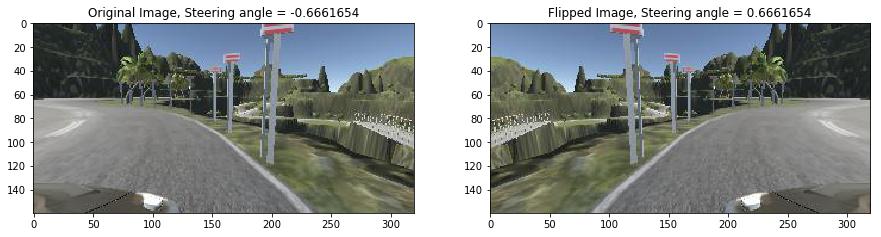

In [762]:
fig, axes = plt.subplots(1, 2, figsize=(15, 9))
axes[0].imshow(sample_valid[0][2])
axes[0].set_title("Original Image, Steering angle = " + str(sample_valid[1][2]))
axes[1].imshow(np.fliplr(sample_valid[0][2]))
axes[1].set_title("Flipped Image, Steering angle = " + str(-sample_valid[1][2]))

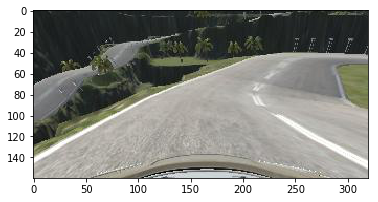

In [276]:
plt.imshow(np.fliplr(sample_valid[0][1]))

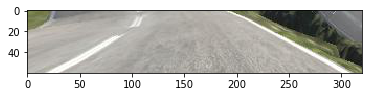

In [280]:
plt.imshow(sample_valid[0][1][75:(160-25), :, :])

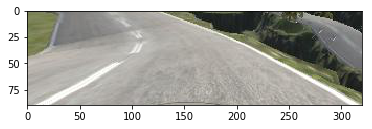

In [281]:
plt.imshow(sample_valid[0][1][50:(160-20), :, :])

In [275]:
count = 0
for i in range(0, 128):    
    is_flip_required = np.random.choice([True, False], p=[0.1, 0.9])
    count += (is_flip_required == True)
print(count)

6


# Model

<img src="https://devblogs.nvidia.com/parallelforall/wp-content/uploads/2016/08/cnn-architecture-624x890.png" alt="drawing" style="width:400px;"/>

In [100]:
import keras

In [710]:
# Setup Keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout, Lambda, Reshape
from keras.layers.convolutional import Conv2D, Cropping2D
from keras.layers.pooling import MaxPooling2D
from keras import optimizers
from keras.backend import tf as ktf

In [723]:
model = Sequential()
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160, 320, 3)))
model.add(Cropping2D(cropping=((50, 20), (0, 0))))
model.add(Lambda(lambda image: tf.image.resize_images(image, (66, 200))))
model.add(Conv2D(filters=24, kernel_size=(5, 5), strides=(2, 2), padding='same'))
# self.model.add(MaxPooling2D())
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Conv2D(filters=36, kernel_size=(5, 5), strides=(2, 2), padding='valid'))
# self.model.add(MaxPooling2D())
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Conv2D(filters=48, kernel_size=(5, 5), strides=(1, 1), padding='valid'))
model.add(MaxPooling2D())
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(100))
model.add(Dropout(0.25))
model.add(Dense(50))
model.add(Dropout(0.25))
model.add(Dense(10))
model.add(Dense(1))

In [724]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_24 (Lambda)           (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_14 (Cropping2D)   (None, 90, 320, 3)        0         
_________________________________________________________________
lambda_25 (Lambda)           (None, 66, 200, 3)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 33, 100, 24)       1824      
_________________________________________________________________
activation_56 (Activation)   (None, 33, 100, 24)       0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 33, 100, 24)       0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 15, 48, 36)        21636     
__________

In [171]:
model = Sequential()
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160, 320, 3)))
model.add(Cropping2D(cropping=((50,20), (0,0))))
model.add(Lambda(lambda image: ktf.image.resize_images(image, (66, 200))))
model.add(Conv2D(filters=24, kernel_size=(5, 5), strides=(2, 2), padding='same'))
model.add(Dropout(0.1))
#model.add(MaxPooling2D())
model.add(Activation('relu'))
model.add(Conv2D(filters=36, kernel_size=(5, 5), strides=(2, 2), padding='valid'))
#model.add(MaxPooling2D())
model.add(Activation('relu'))
model.add(Conv2D(filters=48, kernel_size=(5, 5), strides=(1, 1), padding='valid'))
model.add(MaxPooling2D())
model.add(Activation('relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
model.add(Activation('relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

In [172]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_11 (Lambda)           (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_6 (Cropping2D)    (None, 90, 320, 3)        0         
_________________________________________________________________
lambda_12 (Lambda)           (None, 66, 200, 3)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 33, 100, 24)       1824      
_________________________________________________________________
dropout_1 (Dropout)          (None, 33, 100, 24)       0         
_________________________________________________________________
activation_26 (Activation)   (None, 33, 100, 24)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 15, 48, 36)        21636     
__________

In [165]:
for layer in model.layers[:-9]:
    layer.trainable = False
for layer in model.layers[-9:]:
    layer.trainable = True

In [166]:
for layer in model.layers:
    print(layer, layer.trainable)

<keras.layers.core.Lambda object at 0x000001F9CE22BF28> False
<keras.layers.convolutional.Cropping2D object at 0x000001F9D2EE2518> False
<keras.layers.core.Lambda object at 0x000001F9D2FAEE48> False
<keras.layers.convolutional.Conv2D object at 0x000001F9CF43BE80> False
<keras.layers.core.Activation object at 0x000001F9D2FAEE10> False
<keras.layers.convolutional.Conv2D object at 0x000001F9D2F0AB70> False
<keras.layers.core.Activation object at 0x000001F9D2F0AA20> False
<keras.layers.convolutional.Conv2D object at 0x000001F9D29F7390> False
<keras.layers.pooling.MaxPooling2D object at 0x000001F9D29F7A20> False
<keras.layers.core.Activation object at 0x000001F9D2A164A8> False
<keras.layers.convolutional.Conv2D object at 0x000001F9D2A60CF8> True
<keras.layers.core.Activation object at 0x000001F9D2A3A5F8> True
<keras.layers.convolutional.Conv2D object at 0x000001F9D2A6AF28> True
<keras.layers.core.Activation object at 0x000001F9D2A6AF98> True
<keras.layers.core.Flatten object at 0x000001F9D2

In [167]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_9 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_5 (Cropping2D)    (None, 90, 320, 3)        0         
_________________________________________________________________
lambda_10 (Lambda)           (None, 66, 200, 3)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 33, 100, 24)       1824      
_________________________________________________________________
activation_21 (Activation)   (None, 33, 100, 24)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 15, 48, 36)        21636     
_________________________________________________________________
activation_22 (Activation)   (None, 15, 48, 36)        0         
__________

In [168]:
optimizer = optimizers.Adam()
model.compile(loss='mse', optimizer=optimizer)

In [169]:
#sample_train = next(train_generator)
#model.fit(sample_train[0], sample_train[1], epochs=7)

In [ ]:
model.fit_generator(train_generator, steps_per_epoch=int(len(train_samples)/batch_size), validation_data=validation_generator, 
                    validation_steps=int(len(validation_samples)/batch_size), epochs=5, verbose=1)

In [214]:
model.save('./CarND-Behavioral-Cloning-P3/model.h5')

In [795]:
from keras.models import load_model

In [798]:
model = load_model('./CarND-Behavioral-Cloning-P3/model_combined.h5')

In [799]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_1 (Cropping2D)    (None, 90, 320, 3)        0         
_________________________________________________________________
lambda_2 (Lambda)            (None, 66, 200, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 33, 100, 24)       1824      
_________________________________________________________________
activation_1 (Activation)    (None, 33, 100, 24)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 33, 100, 24)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 48, 36)        21636     
__________

In [965]:
test_data_root = './turn_correction_data/'
test_driving_log = pd.read_csv(test_data_root + 'driving_log.csv')
correction = 0.2
test_driving_log['steering_left'] = test_driving_log['steering'] + correction
test_driving_log['steering_right'] = test_driving_log['steering'] - correction

In [966]:
test_driving_log.head()

,center,left,right,steering,throttle,brake,speed,steering_left,steering_right
0,IMG/center_2019_02_17_21_06_10_140.jpg,IMG/left_2019_02_17_21_06_10_140.jpg,IMG/right_2019_02_17_21_06_10_140.jpg,0.00,0.000000,0.0,0.000242,0.20,-0.20
1,IMG/center_2019_02_17_21_06_11_165.jpg,IMG/left_2019_02_17_21_06_11_165.jpg,IMG/right_2019_02_17_21_06_11_165.jpg,-0.15,1.000000,0.0,7.737897,0.05,-0.35
2,IMG/center_2019_02_17_21_06_11_378.jpg,IMG/left_2019_02_17_21_06_11_378.jpg,IMG/right_2019_02_17_21_06_11_378.jpg,0.00,0.852330,0.0,10.153870,0.20,-0.20
3,IMG/center_2019_02_17_21_06_11_827.jpg,IMG/left_2019_02_17_21_06_11_827.jpg,IMG/right_2019_02_17_21_06_11_827.jpg,0.00,0.376056,0.0,13.595360,0.20,-0.20
4,IMG/center_2019_02_17_21_06_11_981.jpg,IMG/left_2019_02_17_21_06_11_981.jpg,IMG/right_2019_02_17_21_06_11_981.jpg,0.00,0.000000,0.0,14.054860,0.20,-0.20


In [967]:
def read_image(data_root, df, rownum, camera='center'):
    steering_column = 'steering' if camera == 'center' else 'steering_left' if camera == 'left' else 'steering_right'
    return mpimg.imread(data_root + df[camera][rownum].strip()), df[steering_column][rownum]

In [968]:
img, steering_angle = read_image(test_data_root, test_driving_log, 4, 'right')
image_array = np.asarray(img)
prediction = float(model.predict(image_array[None, :, :, :], batch_size=1))
steering_angle, prediction

(-0.20000000000000001, -0.22034525871276855)

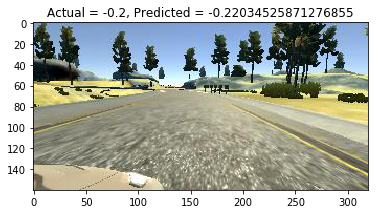

In [969]:
plt.imshow(img)
plt.title("Actual = " + str(steering_angle) + ", Predicted = " + str(prediction))

In [946]:
test_samples.shape

(24108, 2)

In [920]:
test_samples = np.concatenate((
    test_driving_log[['center', 'steering']].values, 
    test_driving_log[['left', 'steering_left']].values,
    test_driving_log[['right', 'steering_right']].values
))

In [958]:
def test_generator(samples, data_root, batch_size=32):
    num_samples = len(samples)
    for offset in range(0, num_samples, batch_size):
        batch_samples = samples[offset:offset+batch_size]

        images = []
        angles = []
        for batch_sample in batch_samples:
            # print("Batch=", batch_sample)
            name = data_root + batch_sample[0].strip()
            center_image = mpimg.imread(name)
            center_angle = float(batch_sample[1])
            images.append(center_image)
            angles.append(center_angle)

        # trim image to only see section with road
        X_train = np.array(images)
        y_train = np.array(angles)
        yield (X_train, y_train)

In [959]:
test_batch_size = 256
test_generator = test_generator(test_samples, test_data_root, test_batch_size)

In [ ]:
next(test_generator(test_samples, './data/', 128))[0].shape

In [957]:
metrics = model.evaluate_generator(test_generator, steps=len(test_samples)//test_batch_size)
for metric_i in range(len(model.metrics_names)):
    metric_name = model.metrics_names[metric_i]
    metric_value = metrics[metric_i]
    print('{}: {}'.format(metric_name, metric_value))    

TypeError: evaluate_generator() got an unexpected keyword argument 'verbose'

In [925]:
metrics = model.evaluate_generator(test_generator, steps=len(test_samples)//test_batch_size)
for metric_i in range(len(model.metrics_names)):
    metric_name = model.metrics_names[metric_i]
    metric_value = metrics[metric_i]
    print('{}: {}'.format(metric_name, metric_value))    

8000/8000 [==============================] - 60s 8ms/step
loss: 0.01854152213037014
acc: 0.54


In [926]:
for metric_i in range(len(model.metrics_names)):
    metric_name = model.metrics_names[metric_i]
    metric_value = metrics[metric_i]
    print('{}: {}'.format(metric_name, metric_value))    

loss: 0.01854152213037014
acc: 0.54


In [963]:
len(test_driving_log)

8036